In [32]:
import numpy as np
import pandas as pd
import torch
import torchaudio

In [ ]:
torchaudio.datasets.TEDLIUM(
    root = 'C:/',
    release = 'release1',
    subset = 'train',
    download = True
)

In [ ]:
from transformers import ElectraConfig, ElectraModel

# Initializing a ELECTRA electra-base-uncased style configuration
configuration = ElectraConfig()

# Initializing a model (with random weights) from the electra-base-uncased style configuration
model = ElectraModel(configuration)

# Accessing the model configuration
configuration = model.config

In [ ]:
if torch.cuda.is_available():
    DEVICE = 'cuda'
else:
    DEVICE = 'cpu'
print(DEVICE)

In [34]:
import opensmile
import numpy as np
import matplotlib.pyplot as plt
import opensmile
import os
import pickle

In [35]:
wav_file = '../data/Raw/Audio/WAV_11025/03bSnISJMiM.wav'

# OpenSMILE 추출기 초기화
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPSv01b,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)

# WAV 파일에서 MFCC 추출
features = smile.process_file(wav_file)

In [51]:
path = '../data/GOOD_presentation/AUDIO'
audio_list = os.listdir(path)

In [44]:
audio_list[0]

'0000.wav'

In [47]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPSv01b,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)

for i, audio in enumerate(audio_list):
    features = smile.process_file(path + '/' + audio)
    jitterLocal = features['jitterLocal_sma3nz'].values
    with open(path +'/' + audio +'.pkl', 'wb') as f:
        pickle.dump(jitterLocal, f)

In [29]:
jitterLocal_list = []
for i, audio in enumerate(audio_list):
    with open(path +'/jitterLocal_for_bad_audio(Raw)/' + audio +'.pkl', 'rb') as f:
        jitterLocal = pickle.load(f)
        jitterLocal_list.append(jitterLocal)

In [ ]:
os.get_cwd

In [41]:
path = '../data/TEDLIUM_release1/train/sph/'
audio_list = os.listdir(path)

In [42]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPSv01b,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)

for i, audio in enumerate(audio_list):
    features = smile.process_file(path + '/' + audio)
    jitterLocal = features['jitterLocal_sma3nz'].values
    with open(path +'/jitterLocal_for_good_audio(TEDLIUM_release1)/' + audio +'.pkl', 'wb') as f:
        pickle.dump(jitterLocal, f)

FileNotFoundError: ffmpeg cannot be found.
Please make sure it is installed.
For further instructions visit: https://audeering.github.io/audiofile/installation.html

In [103]:
path = "../data/GOOD_Presentation/AUDIO"
wav_list = os.listdir(path)

In [107]:
wav_list =wav_list[46:]

In [108]:
wav_list

['JohnDoerr_2007.wav.wav',
 'JohnFrancis_2008.wav.wav',
 'JohnHodgman_2008.wav.wav',
 'JohnLloyd_2009G.wav.wav',
 'JohnWooden_2001.wav.wav',
 'JosephNye_2010G.wav.wav',
 'JosephPine_2004.wav.wav',
 'JuliaSweeney_2006.wav.wav',
 'KamalMeattle_2009U.wav.wav',
 'LauraTrice_2008.wav.wav',
 'LesleyHazleton_2010X.wav.wav',
 'LorettaNapoleoni_2009G.wav.wav',
 'MarcPachter_2008P.wav.wav',
 'MarkBittman_2007P.wav.wav',
 'MarkRoth_2010.wav.wav',
 'MarvinMinsky_2003.wav.wav',
 'MatthieuRicard_2004.wav.wav',
 'MenaTrott_2006.wav.wav',
 'NicMarks_2010G.wav.wav',
 'NielsDiffrient_2002a.wav.wav',
 'PatrickAwuah_2007G.wav.wav',
 'PeterDonnelly_2005G.wav.wav',
 'PeterEigen_2009X.wav.wav',
 'PeterReinhart_2008P.wav.wav',
 'PhilippeStarck_2007.wav.wav',
 'RozSavage_2010Z.wav.wav',
 'SasaVucinic_2005G.wav.wav',
 'SherwinNuland_2003.wav.wav',
 'SherylSandberg_2010W.wav.wav',
 'SherylWuDunn_2010G.wav.wav',
 'StephenPetranek_2002.wav.wav',
 'SugataMitra_2010G.wav.wav',
 'SuheirHammad_2010W.wav.wav',
 'Thomas

In [75]:
for i, item in enumerate(wav_list):
    rename = item[:-4]
    os.rename(path +'/' + item, path +'/' + rename)

In [67]:
pip install SPHFile

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for SPHFile: filename=sphfile-1.0.3-py3-none-any.whl size=4131 sha256=31cda1346fc43d1d652e0cb23d7afe68e4c7800cc8499865b7782085af63fa8d
  Stored in directory: c:\users\junghwan\appdata\local\pip\cache\wheels\e7\7c\97\af4002acc546261358a31e7ebd8dc45792939f986061014cd2
Successfully built SPHFile
Note: you may need to restart the kernel to use updated packages.


In [101]:
import os
from sphfile import SPHFile


path = '../data/GOOD_Presentation/AUDIO/'  # Path of folder containing .sph files

folder = os.fsencode(path)

filenames = []
folderpath = []
outputfile = []

for file in os.listdir(folder):
    filename = os.fsdecode(file)
    if filename.endswith( ('.sph') ): # whatever file types you're using...
        filenames.append(filename)

length = len(filenames) 


for i,item in enumerate(wav_list):
	fpath = os.path.join(path+filenames[i])
	folderpath.append(fpath)
	outpath = os.path.join(item + ".wav")	
	outputfile.append(outpath)
print(folderpath)
print(outputfile)


for i in range(length):
	sph =SPHFile(folderpath[i])
	print(sph.format)
	sph.write_wav(outputfile[i]) # Customize the period of time to crop

['../data/GOOD_Presentation/AUDIO/JohnDoerr_2007.sph', '../data/GOOD_Presentation/AUDIO/JohnFrancis_2008.sph', '../data/GOOD_Presentation/AUDIO/JohnHodgman_2008.sph', '../data/GOOD_Presentation/AUDIO/JohnLloyd_2009G.sph', '../data/GOOD_Presentation/AUDIO/JohnWooden_2001.sph', '../data/GOOD_Presentation/AUDIO/JosephNye_2010G.sph', '../data/GOOD_Presentation/AUDIO/JosephPine_2004.sph', '../data/GOOD_Presentation/AUDIO/JuliaSweeney_2006.sph', '../data/GOOD_Presentation/AUDIO/KamalMeattle_2009U.sph', '../data/GOOD_Presentation/AUDIO/LauraTrice_2008.sph', '../data/GOOD_Presentation/AUDIO/LesleyHazleton_2010X.sph', '../data/GOOD_Presentation/AUDIO/LorettaNapoleoni_2009G.sph', '../data/GOOD_Presentation/AUDIO/MarcPachter_2008P.sph', '../data/GOOD_Presentation/AUDIO/MarkBittman_2007P.sph', '../data/GOOD_Presentation/AUDIO/MarkRoth_2010.sph', '../data/GOOD_Presentation/AUDIO/MarvinMinsky_2003.sph', '../data/GOOD_Presentation/AUDIO/MatthieuRicard_2004.sph', '../data/GOOD_Presentation/AUDIO/MenaT

In [87]:
folderpath[0]

'../data/GOOD_Presentation/AUDIO/JohnDoerr_2007.sph'

In [82]:
sph = SPHFile(folderpath[0])

In [83]:
sph

In [85]:
len(sph.time_range())

19541171

In [86]:
19541171/60

325686.18333333335

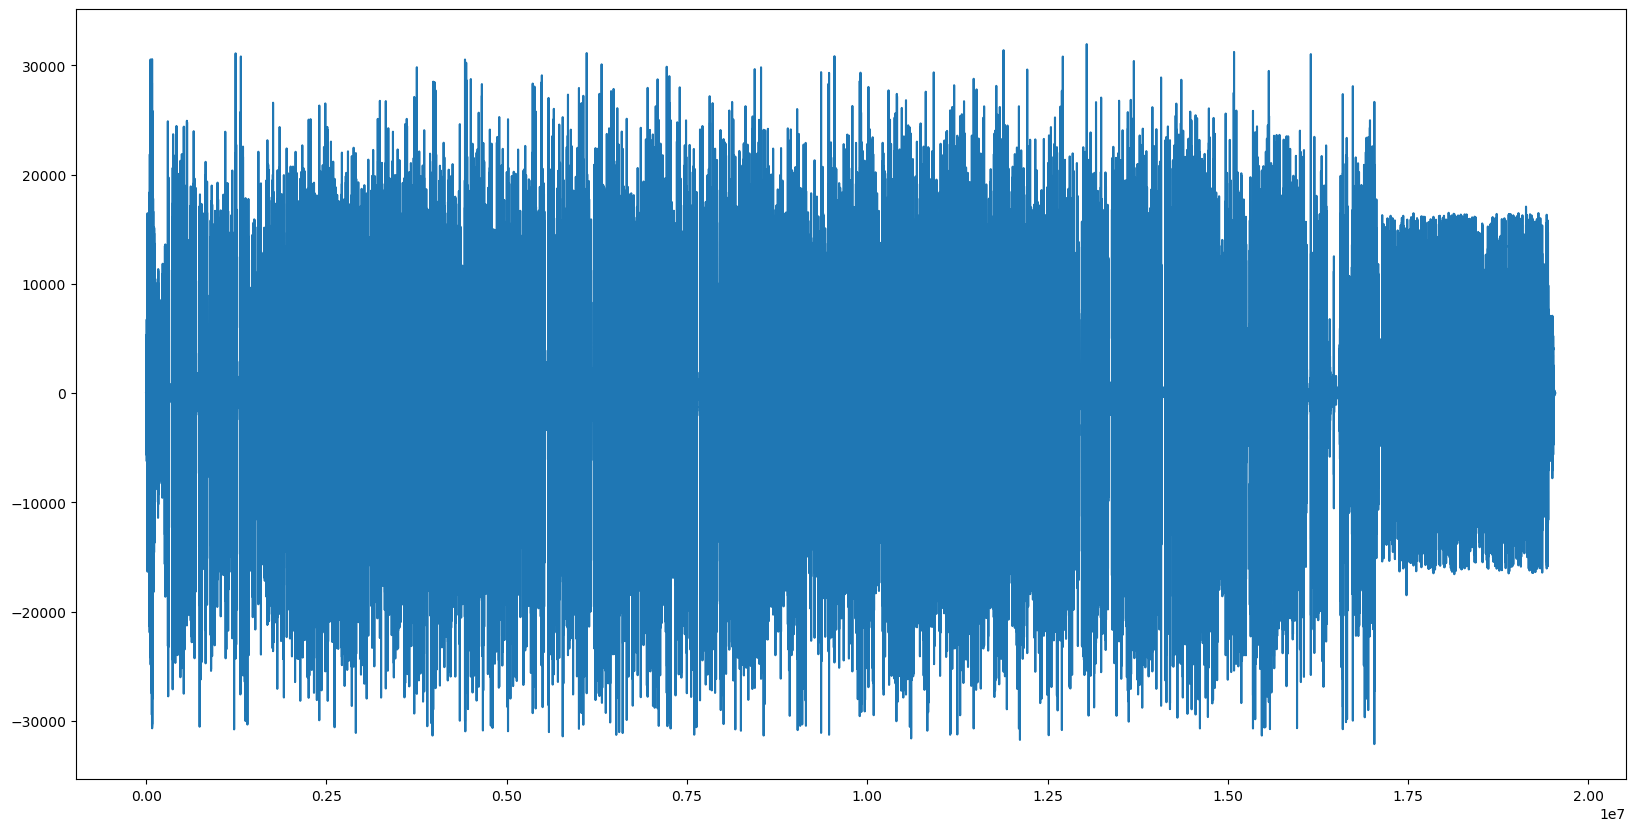

In [93]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(sph.time_range())


In [94]:
dir(sph)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_format',
 '_rawbytes',
 'content',
 'filename',
 'format',
 'open',
 'seconds_to_offset',
 'time_range',
 'write_sph',
 'write_wav']

In [100]:
len(sph.content)/100

195411.71